# Завданння 2.
1. Побудувати попередньо навчену модель VGG16 (або VGG19, Resnet та інші).
2. Зробити тонке налаштування (заморозити частину шарів, додати зверху шари).
3. Повторити всі кроки як і для попереднього завдання.

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np

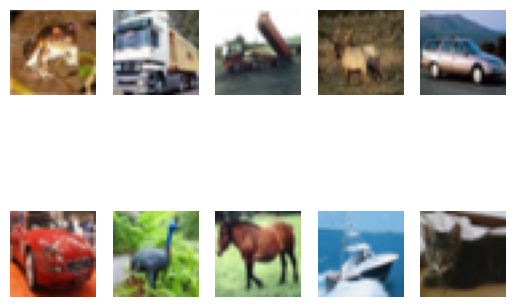

In [6]:
# Завантажити датасет, вивести перші 10 зображень.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

In [7]:
# Побудувати попередньо навчену модель VGG16 (або VGG19, Resnet та інші).
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in resnet.layers:
    layer.trainable = False


model = Sequential([
    resnet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Зробити тонке налаштування (заморозити частину шарів, додати зверху шари)
for layer in resnet.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
## Повторити всі кроки як і для попереднього завдання
# При навчанні використовувати кол-бекі (рання зупинка та (або) зменшення швидкості навчання).
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.1570 - loss: 4.7248 - val_accuracy: 0.3810 - val_loss: 1.8688 - learning_rate: 1.0000e-05
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.2987 - loss: 2.4571 - val_accuracy: 0.4450 - val_loss: 1.6229 - learning_rate: 1.0000e-05
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.3573 - loss: 1.9860 - val_accuracy: 0.4721 - val_loss: 1.5242 - learning_rate: 1.0000e-05
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.4038 - loss: 1.7617 - val_accuracy: 0.4911 - val_loss: 1.4624 - learning_rate: 1.0000e-05
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4366 - loss: 1.6394 - val_accuracy: 0.5090 - val_loss: 1.4128 - learning_rate: 1.0000e-05
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4592 - loss: 1.5724 - val_accuracy: 0.5218 - val_loss: 1.3724 - learning_rate: 1.0000e-05
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/ste

In [10]:
# Вивести summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,278,496 (104.06 MB)

 Trainable params: 1,581,834 (6.03 MB)

 Non-trainable params: 22,532,992 (85.96 MB)

 Optimizer params: 3,163,670 (12.07 MB)

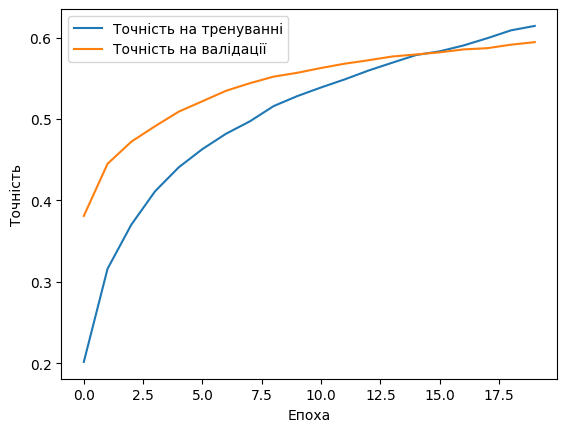

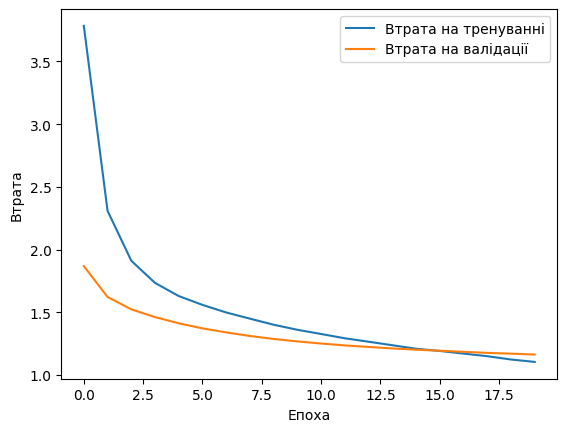

In [11]:
# Побудувати графіки функції втрат і точності.
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Втрата на тренуванні')
plt.plot(history.history['val_loss'], label='Втрата на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.show()

In [12]:
# Класифікаційний звіт.
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
              precision    recall  f1-score   support

           0       0.65      0.62      0.64      1000
           1       0.64      0.63      0.63      1000
           2       0.54      0.49      0.51      1000
           3       0.47      0.47      0.47      1000
           4       0.56      0.54      0.55      1000
           5       0.55      0.51      0.53      1000
           6       0.64      0.71      0.67      1000
           7       0.61      0.64      0.62      1000
           8       0.65      0.68      0.67      1000
           9       0.61      0.67      0.64      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



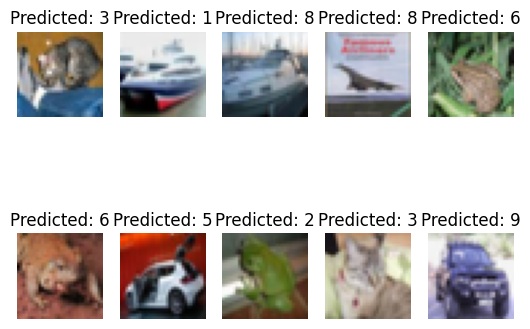

In [13]:
# Візуалізацію розпізнавання.
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()

Висновок: У цьому коді використовується попередньо навчена модель ResNet50 для класифікації зображень із набору CIFAR-10. Частина шарів ResNet заморожується для збереження навчених параметрів, а зверху додаються нові шари для адаптації до нового завдання. Після кількох епох точність на тестовому наборі даних досягає приблизно 59%. Модель демонструє поступове покращення точності й втрати під час навчання, а також розраховується класифікаційний звіт для оцінки результатів моделі.